### Let's see how repaint's constants work

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
from util import (
    get_resampling_steps,
    get_torch_size_string,
)
from diffusion import (
    get_ddpm_constants,
    plot_ddpm_constants,
)
np.set_printoptions(precision=3)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("Ready.")

Ready.


### DDPM

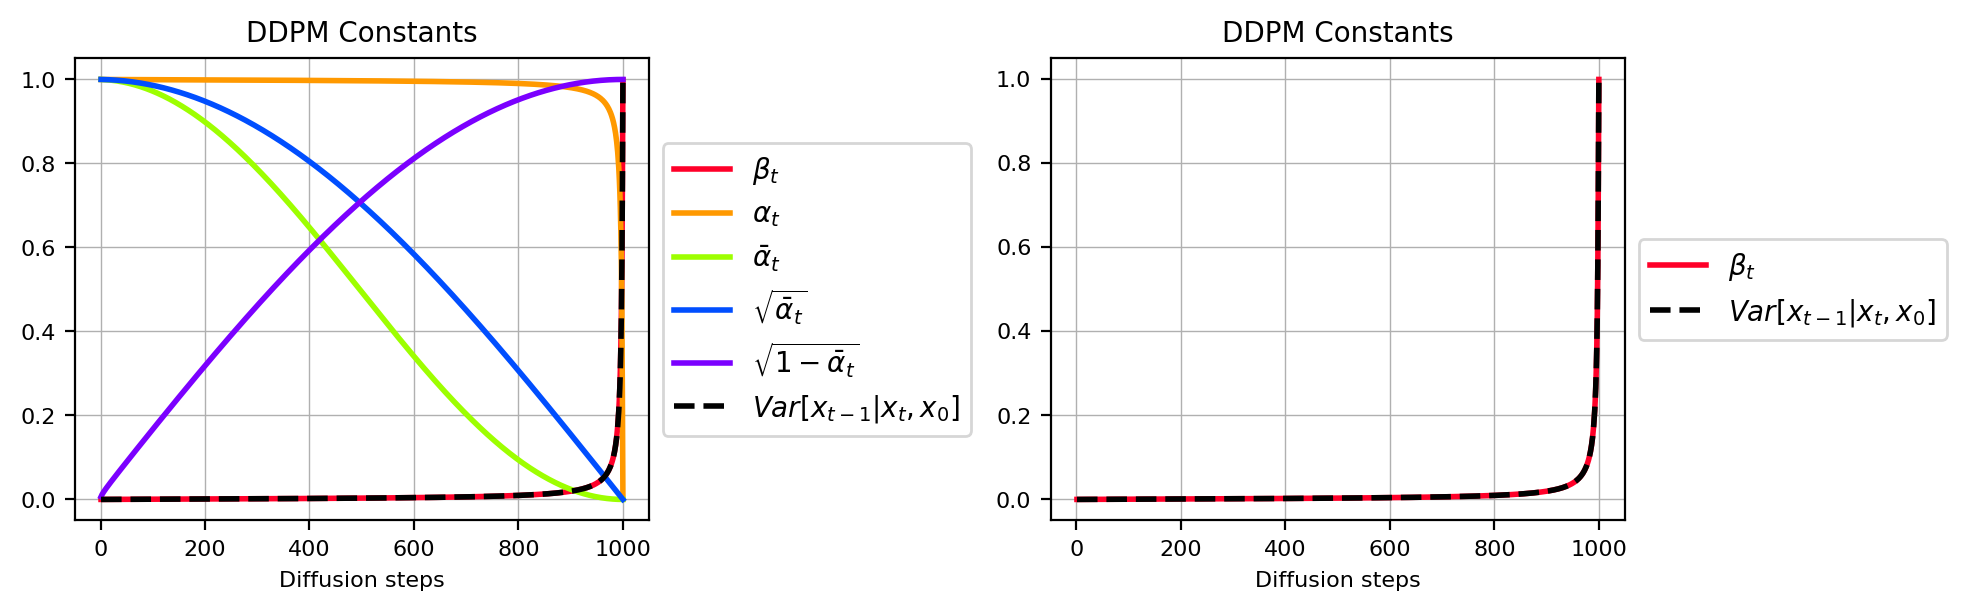

In [11]:
dc = get_ddpm_constants(
    schedule_name = 'cosine', # 'linear', 'cosine'
    T             = 1000,
    np_type       = np.float32,
)
# for k_idx,key in enumerate(dc.keys()): print ("[%2d] key:[%s]"%(k_idx,key))
plot_ddpm_constants(dc)

### Get resampling steps

resampling_steps:[4571]


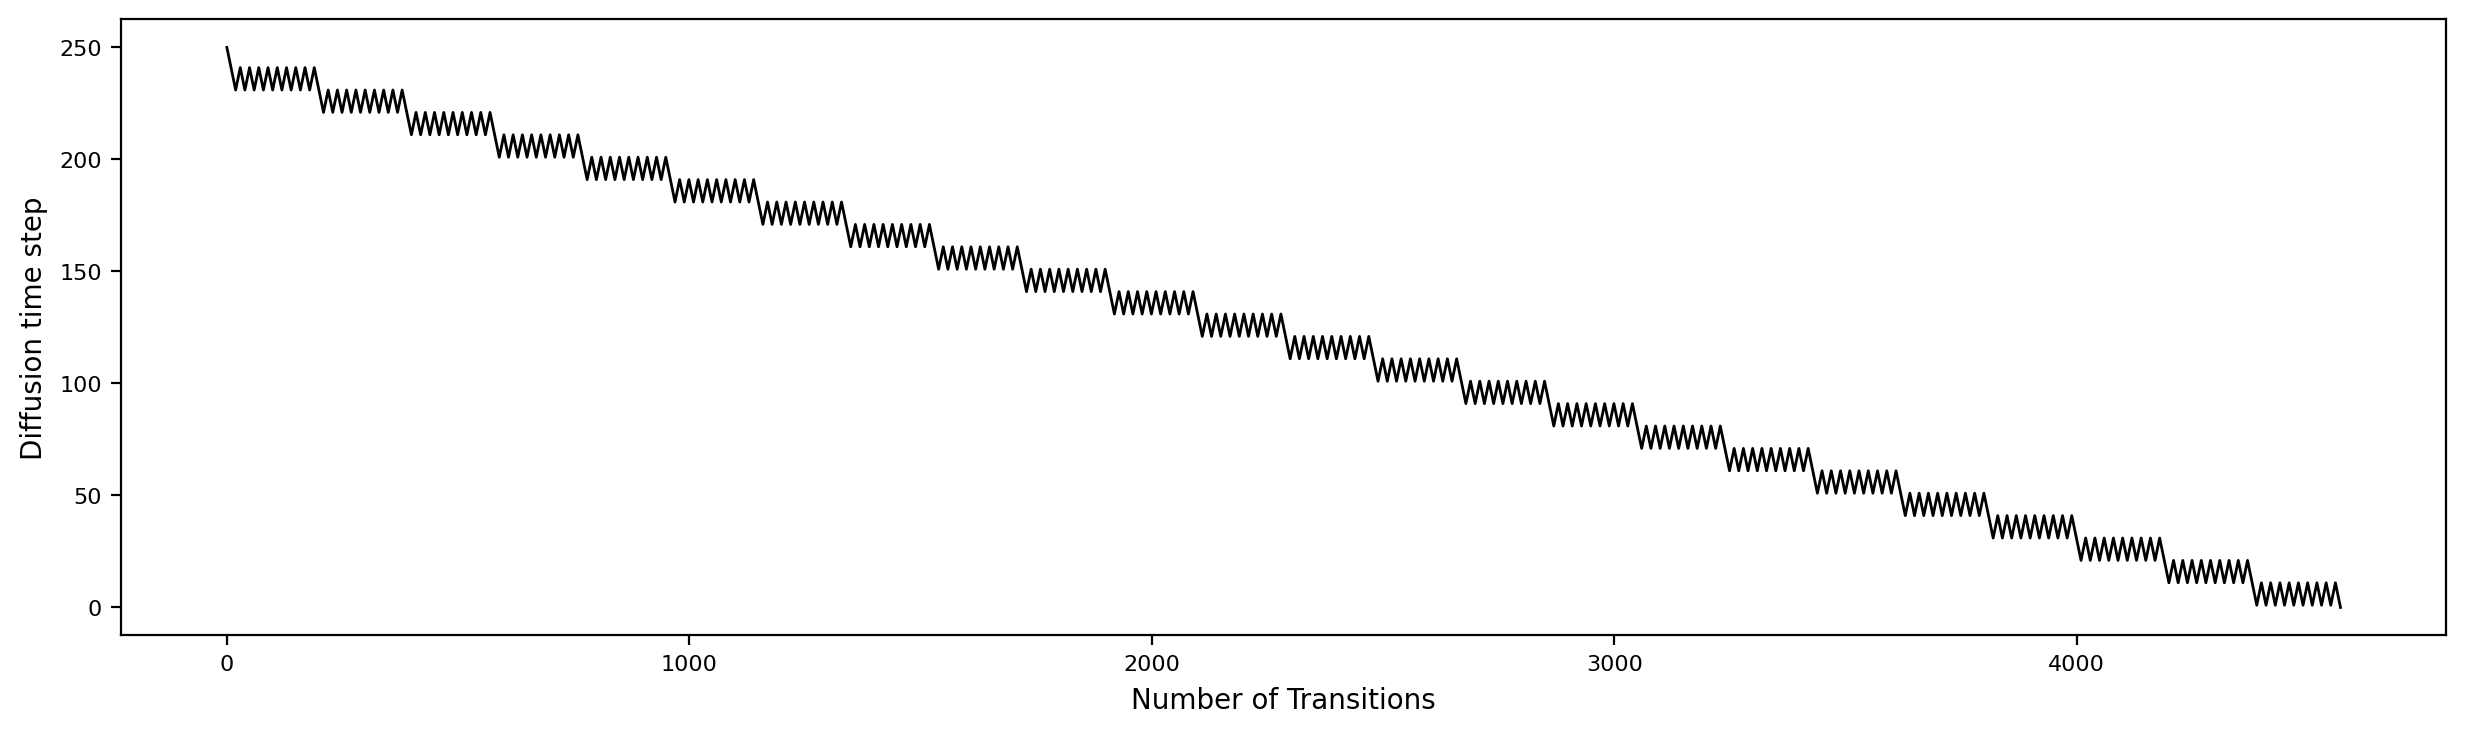

In [12]:
resampling_steps = get_resampling_steps(250,10,10)
print ("resampling_steps:[%d]"%(len(resampling_steps)))
# Plot
plt.figure(figsize=(15,4))
plt.plot(resampling_steps,'-',color='k',lw=1)
plt.xlabel('Number of Transitions')
plt.ylabel('Diffusion time step')
plt.show()

### Loop

In [15]:
device   = 'mps'
n_sample = 1
C = 1
L = 100

timestep_prev = -1
for (idx,t) in enumerate(resampling_steps): # for all repaint steps

    # Batch-fy constants
    step = th.full(
        size       = (n_sample,),
        fill_value = t,
        device     = device,
        dtype      = th.long) # [n_sample]
    with th.no_grad():
        eps_t = th.randn((n_sample,C,L)) # [n_sample x C x L]
    betas_t = th.gather(
        input = th.from_numpy(dc['betas']).to(device), # [T]
        dim   = -1,
        index = step
    ).reshape((-1,1,1)) # [n_sample x 1 x 1]
    sqrt_one_minus_alphas_bar_t = th.gather(
        input = th.from_numpy(dc['sqrt_one_minus_alphas_bar']).to(device), # [T]
        dim   = -1,
        index = step
    ).reshape((-1,1,1)) # [n_sample x 1 x 1]
    sqrt_recip_alphas_t = th.gather(
        input = th.from_numpy(dc['sqrt_recip_alphas']).to(device), # [T]
        dim   = -1,
        index = step
    ).reshape((-1,1,1)) # [n_sample x 1 x 1]
    
    # Impaint
    if idx == 0: # the initial inpaint step
        x_t = th.randn((n_sample,C,L))
    elif t == 0: # the final inpainting step
        

        
        
    timestep_prev = timestep

print ("Done.")

Done.
